In [239]:
#We are importing all the required libraries here.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
import datetime
import time
from matplotlib import style
import statsmodels.api as sm
# plt.style()
plt.style.available
sns.set(style="darkgrid", context="talk", color_codes=True)  
%matplotlib inline

In [240]:
countries = pd.read_csv('Countries.csv')

In [241]:
countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [242]:
del countries['Region']

In [243]:
plot_cols2=['Net migration','Birthrate','Deathrate','Agriculture','Industry','Service','Pop. Density (per sq. mi.)'
      ,'Coastline (coast/area ratio)','Literacy (%)','Arable (%)','Crops (%)',
            'Phones (per 1000)','Infant mortality (per 1000 births)','Other (%)','Climate']

for x in plot_cols2:
    
    countries[x]=countries[x].str.split(',')
    countries[x]=countries[x].astype(object)
    countries[x]=countries[x].str.join('.')
    countries[x]=countries[x].astype(float)

In [244]:
countries.head()

,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [245]:
countries=countries.dropna()

In [246]:
countries.dtypes

Country                                object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

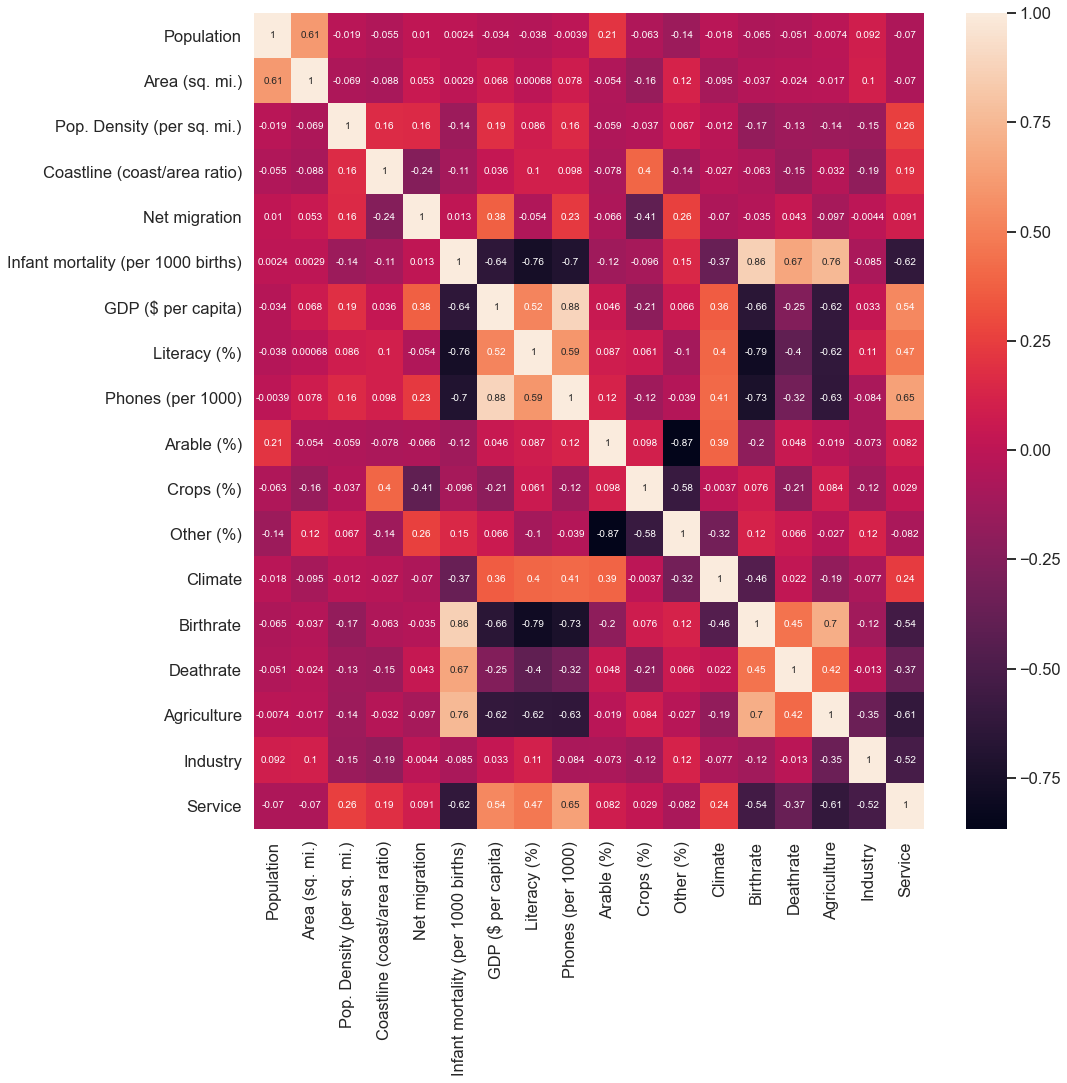

In [247]:
# CORRELATION MATRIX.
corrMatrix = countries.corr()
# print (corrMatrix)
plt.figure(figsize=(15,15))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [248]:
countries.shape

(179, 19)

In [249]:
countries.head(0)

,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service


In [250]:
countries.drop(['Net migration','Arable (%)','Crops (%)','Pop. Density (per sq. mi.)', 'Area (sq. mi.)','Industry',
                'Population','Coastline (coast/area ratio)','Other (%)','Population','Climate'],axis=1,inplace=True)

In [251]:
countries.head(0)

,Country,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Birthrate,Deathrate,Agriculture,Service


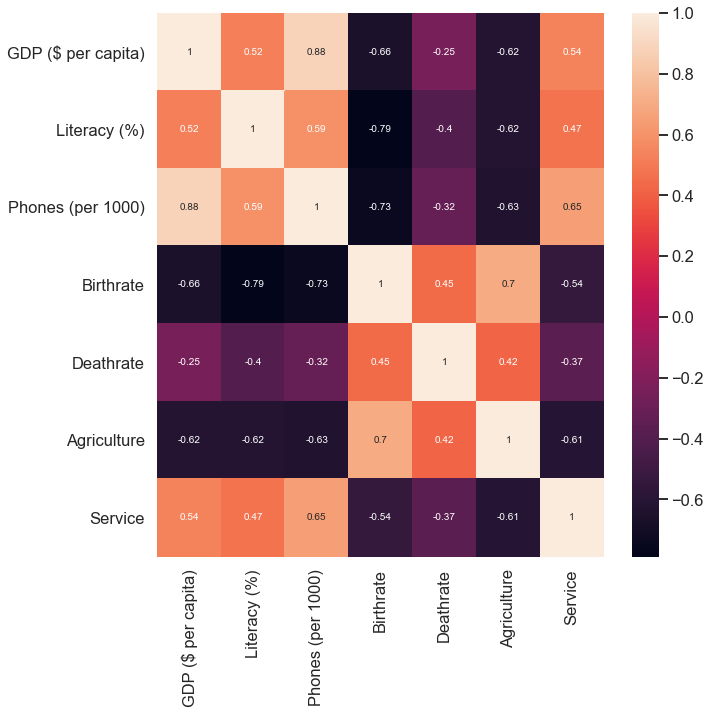

In [252]:
plt.figure(figsize=[10,10])
sns.heatmap(countries.drop('Infant mortality (per 1000 births)',axis=1).corr(),annot=True)

In [253]:
# creating dummies out of categorical variables
countries=pd.get_dummies(countries)

In [254]:
# setting birthrate as predictor
predictors=countries['Birthrate']
target=countries['Infant mortality (per 1000 births)']

In [255]:

import statsmodels.api as sm
predictors= sm.add_constant(predictors)
lm_1 = sm.OLS(target,predictors).fit()
print(lm_1.summary())

                                    OLS Regression Results                                    
Dep. Variable:     Infant mortality (per 1000 births)   R-squared:                       0.743
Model:                                            OLS   Adj. R-squared:                  0.742
Method:                                 Least Squares   F-statistic:                     512.4
Date:                                Wed, 03 Jun 2020   Prob (F-statistic):           3.84e-54
Time:                                        17:26:19   Log-Likelihood:                -770.01
No. Observations:                                 179   AIC:                             1544.
Df Residuals:                                     177   BIC:                             1550.
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
                 coef    std err          t      P

In [256]:
# setting literacy as predictor
predictors=countries['Literacy (%)']
predictors= sm.add_constant(predictors)
lm_1 = sm.OLS(target,predictors).fit()
print(lm_1.summary())

                                    OLS Regression Results                                    
Dep. Variable:     Infant mortality (per 1000 births)   R-squared:                       0.579
Model:                                            OLS   Adj. R-squared:                  0.577
Method:                                 Least Squares   F-statistic:                     243.9
Date:                                Wed, 03 Jun 2020   Prob (F-statistic):           3.99e-35
Time:                                        17:26:19   Log-Likelihood:                -814.17
No. Observations:                                 179   AIC:                             1632.
Df Residuals:                                     177   BIC:                             1639.
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
                   coef    std err          t     

In [257]:
# setting phonesper1000 as predictor
predictors=countries['Phones (per 1000)']
predictors= sm.add_constant(predictors)
lm_1 = sm.OLS(target,predictors).fit()
print(lm_1.summary())

                                    OLS Regression Results                                    
Dep. Variable:     Infant mortality (per 1000 births)   R-squared:                       0.489
Model:                                            OLS   Adj. R-squared:                  0.486
Method:                                 Least Squares   F-statistic:                     169.3
Date:                                Wed, 03 Jun 2020   Prob (F-statistic):           1.36e-27
Time:                                        17:26:19   Log-Likelihood:                -831.62
No. Observations:                                 179   AIC:                             1667.
Df Residuals:                                     177   BIC:                             1674.
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
                        coef    std err          t

In [259]:
# setting Agriculture as predictor
predictors=countries['Agriculture']
predictors= sm.add_constant(predictors)
lm_1 = sm.OLS(target,predictors).fit()
print(lm_1.summary())

                                    OLS Regression Results                                    
Dep. Variable:     Infant mortality (per 1000 births)   R-squared:                       0.575
Model:                                            OLS   Adj. R-squared:                  0.573
Method:                                 Least Squares   F-statistic:                     239.8
Date:                                Wed, 03 Jun 2020   Prob (F-statistic):           9.41e-35
Time:                                        17:26:19   Log-Likelihood:                -815.03
No. Observations:                                 179   AIC:                             1634.
Df Residuals:                                     177   BIC:                             1640.
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
                  coef    std err          t      

In [260]:
predictors=countries['Deathrate']
predictors= sm.add_constant(predictors)
lm_1 = sm.OLS(target,predictors).fit()
print(lm_1.summary())

                                    OLS Regression Results                                    
Dep. Variable:     Infant mortality (per 1000 births)   R-squared:                       0.443
Model:                                            OLS   Adj. R-squared:                  0.440
Method:                                 Least Squares   F-statistic:                     140.9
Date:                                Wed, 03 Jun 2020   Prob (F-statistic):           2.79e-24
Time:                                        17:26:19   Log-Likelihood:                -839.29
No. Observations:                                 179   AIC:                             1683.
Df Residuals:                                     177   BIC:                             1689.
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
                 coef    std err          t      P

In [261]:
# dropping all unnecessary columns.
countries.drop(['Service','Literacy (%)','Agriculture','Phones (per 1000)'],axis=1,inplace=True)

In [262]:
# eliminating everything that has low correlation.
cols_to_drop=countries.corr()[(countries.corr()['Infant mortality (per 1000 births)']<=0.5) & (countries.corr()['Infant mortality (per 1000 births)']>=-0.5)]
cols_to_drop=cols_to_drop.reset_index()['index']
cols_to_drop=list(cols_to_drop)

In [263]:
countries.drop(cols_to_drop,axis=1,inplace=True)

In [264]:
countries.shape

(179, 4)

In [265]:
countries.head()

,Infant mortality (per 1000 births),GDP ($ per capita),Birthrate,Deathrate
0,163.07,700.0,46.60,20.34
1,21.52,4500.0,15.11,5.22
2,31.00,6000.0,17.14,4.61
6,21.03,8600.0,14.17,5.34
7,19.46,11000.0,16.93,5.37


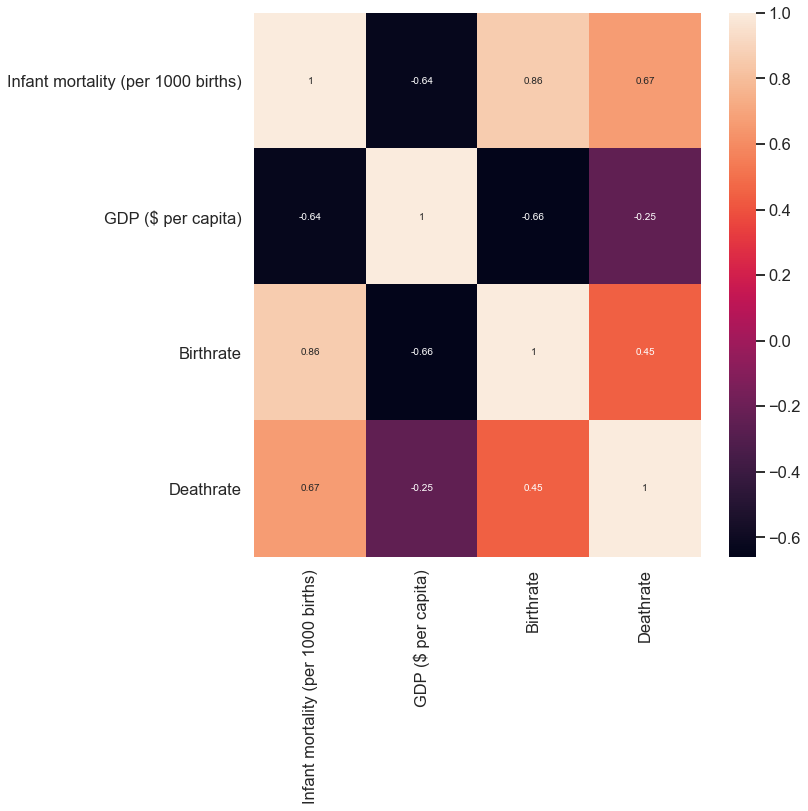

In [266]:
# new correlation matrix.
plt.figure(figsize=[10,10])
sns.heatmap(countries.corr(),annot=True)

In [267]:
predictors=countries.drop('Infant mortality (per 1000 births)',axis=1)
target=countries['Infant mortality (per 1000 births)']

In [268]:
# USing birthrate, death rate and, GDP as predictors.
predictors1=predictors[['Birthrate','Deathrate','GDP ($ per capita)']]
predictors1= sm.add_constant(predictors1)
lm_1 = sm.OLS(target,predictors1).fit()
print(lm_1.summary())

                                    OLS Regression Results                                    
Dep. Variable:     Infant mortality (per 1000 births)   R-squared:                       0.855
Model:                                            OLS   Adj. R-squared:                  0.853
Method:                                 Least Squares   F-statistic:                     345.1
Date:                                Wed, 03 Jun 2020   Prob (F-statistic):           3.17e-73
Time:                                        17:26:19   Log-Likelihood:                -718.60
No. Observations:                                 179   AIC:                             1445.
Df Residuals:                                     175   BIC:                             1458.
Df Model:                                           3                                         
Covariance Type:                            nonrobust                                         
                         coef    std err          

Mean_Squared_Error : 179.687591129173
r_square_value : 0.8554232414504712


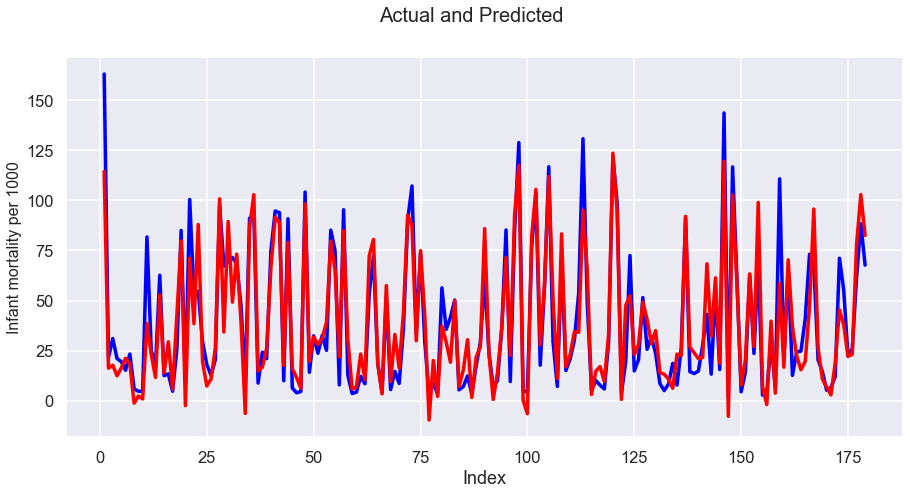

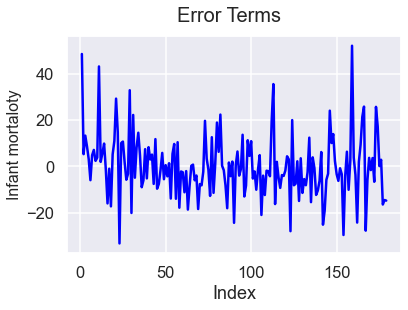

In [269]:
pred=lm_1.predict(predictors1)
# Deathrate and GDP per capita give very bad prediction
c = [i for i in range(1,180,1)]
fig=plt.figure(figsize=[15,7])
# fig = plt.figure()
plt.plot(c,target, color="blue", linewidth=3.5, linestyle="-")     # Actual
plt.plot(c,pred, color="red",  linewidth=3.5, linestyle="-")  #predicted
fig.suptitle('Actual and Predicted', fontsize=20)             
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Infant mortality per 1000', fontsize=16)

c = [i for i in range(1,180,1)]
fig = plt.figure()
plt.plot(c,target-pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)             
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Infant mortaloty', fontsize=16)    


mse=sm.tools.eval_measures.mse(pred, target, axis=0)
r_squared=lm_1.rsquared
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

#good model but GDP and birthrate are correlated.Hence we can't use.

In [270]:
# Using gdp and birthrate as predictors
predictors3=predictors[['Birthrate','GDP ($ per capita)']]
predictors3= sm.add_constant(predictors3)
lm_3 = sm.OLS(target,predictors3).fit()
print(lm_3.summary())

                                    OLS Regression Results                                    
Dep. Variable:     Infant mortality (per 1000 births)   R-squared:                       0.752
Model:                                            OLS   Adj. R-squared:                  0.749
Method:                                 Least Squares   F-statistic:                     267.1
Date:                                Wed, 03 Jun 2020   Prob (F-statistic):           4.83e-54
Time:                                        17:26:20   Log-Likelihood:                -766.84
No. Observations:                                 179   AIC:                             1540.
Df Residuals:                                     176   BIC:                             1549.
Df Model:                                           2                                         
Covariance Type:                            nonrobust                                         
                         coef    std err          

Mean_Squared_Error : 308.0043051307719
r_square_value : 0.7521795257242039


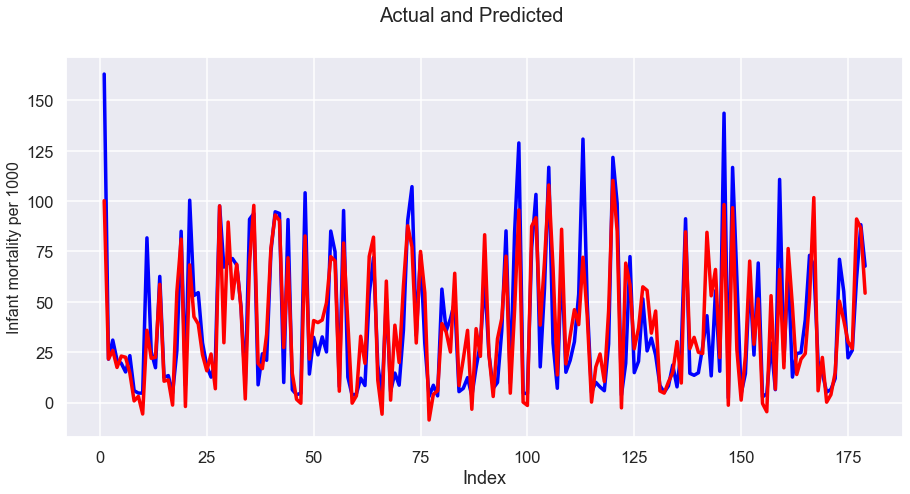

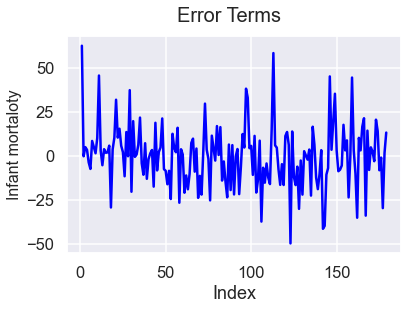

In [271]:
pred=lm_3.predict(predictors3)


c = [i for i in range(1,180,1)]
fig=plt.figure(figsize=[15,7])
# fig = plt.figure()
plt.plot(c,target, color="blue", linewidth=3.5, linestyle="-")     # Actual
plt.plot(c,pred, color="red",  linewidth=3.5, linestyle="-")  # predicted
fig.suptitle('Actual and Predicted', fontsize=20)             
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Infant mortality per 1000', fontsize=16)

c = [i for i in range(1,180,1)]
fig = plt.figure()
plt.plot(c,target-pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)           
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Infant mortaloty', fontsize=16)    


mse=sm.tools.eval_measures.mse(pred, target, axis=0)
r_squared=lm_3.rsquared
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

#not a great model since birthrate and GDP are correlated

In [272]:
#Deathrate and GDP percapita as predictors.
predictors4=predictors[['Deathrate','GDP ($ per capita)']]
import statsmodels.api as sm
predictors4= sm.add_constant(predictors4)
lm_4 = sm.OLS(target,predictors4).fit()
print(lm_4.summary())

                                    OLS Regression Results                                    
Dep. Variable:     Infant mortality (per 1000 births)   R-squared:                       0.683
Model:                                            OLS   Adj. R-squared:                  0.679
Method:                                 Least Squares   F-statistic:                     189.4
Date:                                Wed, 03 Jun 2020   Prob (F-statistic):           1.30e-44
Time:                                        17:26:20   Log-Likelihood:                -788.92
No. Observations:                                 179   AIC:                             1584.
Df Residuals:                                     176   BIC:                             1593.
Df Model:                                           2                                         
Covariance Type:                            nonrobust                                         
                         coef    std err          

Mean_Squared_Error : 394.20402706366593
r_square_value : 0.682823170582409


Text(0, 0.5, 'Infant mortaloty')

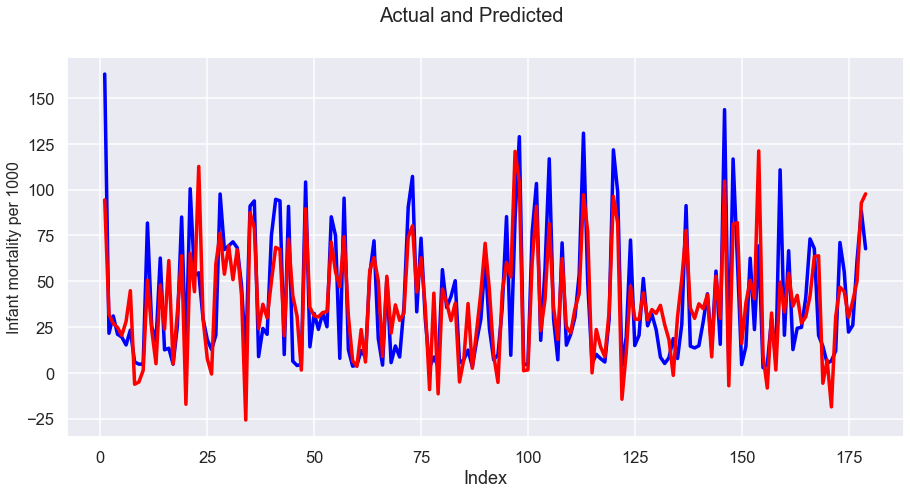

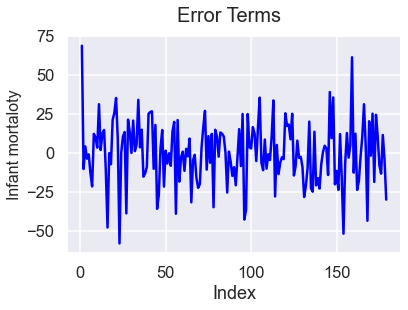

In [273]:
pred=lm_4.predict(predictors4)
# Actual vs Predicted

c = [i for i in range(1,180,1)]
fig=plt.figure(figsize=[15,7])
# fig = plt.figure()

plt.plot(c,target, color="blue", linewidth=3.5, linestyle="-")     #Actual
plt.plot(c,pred, color="red",  linewidth=3.5, linestyle="-")  # predicted
fig.suptitle('Actual and Predicted', fontsize=20)         
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Infant mortality per 1000', fontsize=16)

mse=sm.tools.eval_measures.mse(pred, target, axis=0)
r_squared=lm_4.rsquared
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)


# error graph
c = [i for i in range(1,180,1)]
fig = plt.figure()
plt.plot(c,target-pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)           
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Infant mortaloty', fontsize=16)    

#not a great model.

In [274]:
# Using birthrate and deathrate are predictors
predictors2=predictors[['Birthrate','Deathrate']]
import statsmodels.api as sm
predictors2= sm.add_constant(predictors2)
lm_2 = sm.OLS(target,predictors2).fit()
print(lm_2.summary())

                                    OLS Regression Results                                    
Dep. Variable:     Infant mortality (per 1000 births)   R-squared:                       0.842
Model:                                            OLS   Adj. R-squared:                  0.840
Method:                                 Least Squares   F-statistic:                     468.5
Date:                                Wed, 03 Jun 2020   Prob (F-statistic):           3.28e-71
Time:                                        17:26:21   Log-Likelihood:                -726.63
No. Observations:                                 179   AIC:                             1459.
Df Residuals:                                     176   BIC:                             1469.
Df Model:                                           2                                         
Covariance Type:                            nonrobust                                         
                 coef    std err          t      P

Mean_Squared_Error : 196.54831472411684
r_square_value : 0.8418570917300704


Text(0, 0.5, 'Infant mortality')

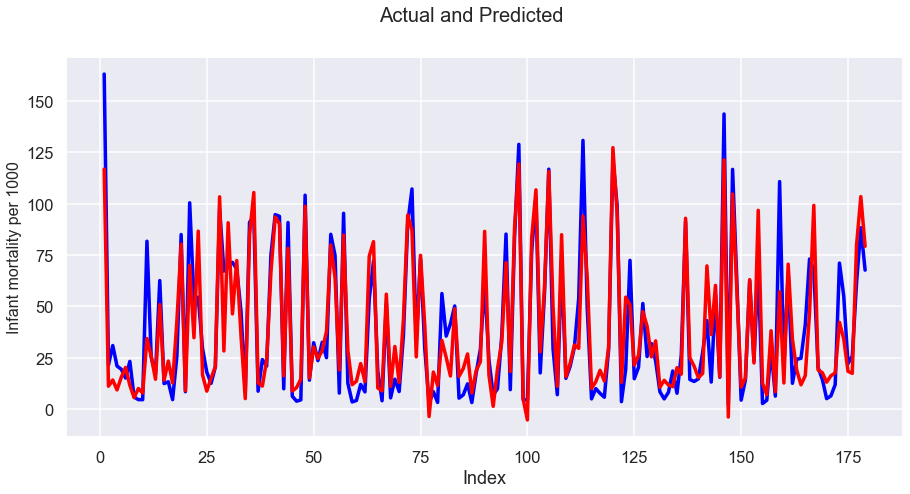

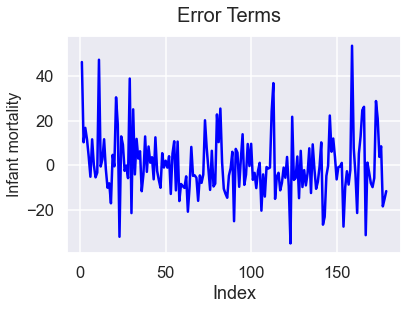

In [275]:
pred=lm_2.predict(predictors2)
c = [i for i in range(1,180,1)]
fig=plt.figure(figsize=[15,7])
# fig = plt.figure()

plt.plot(c,target, color="blue", linewidth=3.5, linestyle="-")     #Actual
plt.plot(c,pred, color="red",  linewidth=3.5, linestyle="-")  # predicted
fig.suptitle('Actual and Predicted', fontsize=20)             
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Infant mortality per 1000', fontsize=16)

mse=sm.tools.eval_measures.mse(pred, target, axis=0)
r_squared=lm_2.rsquared
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)


c = [i for i in range(1,180,1)]
fig = plt.figure()
plt.plot(c,target-pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)               
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Infant mortality', fontsize=16)    

#This is a good model